### Assignment - Bike Sharing

In [1]:
#Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Additional Libraries
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

#### Data Understanding

In [3]:
# Loading data
df=pd.read_csv("day.csv")

In [4]:
# Read Dataframe
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [5]:
df.shape

(730, 16)

In [6]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Checking Data for Null
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#None found with Null values

In [10]:
# Checking for the features
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
#Deleting Unwanted columns
#Deleting all the columns that are unique
unique_cols = [col for col in df.columns if df[col].nunique() == len(df)]
unique_cols

['instant', 'dteday']

In [12]:
# # Dropping 'casual' and 'registered' as together they add up to cnt
drop_cols=['instant','dteday']
df.drop(drop_cols,axis=1,inplace=True)
df.shape


(730, 14)

In [13]:
df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dtype: int64

### Understanding the Data
##### Data Transformation 

In [14]:
#Sort on Month
df.sort_values(by='mnth', ascending=True, inplace=True)
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,4,0,12,0,1,1,2,15.819153,19.69625,82.7083,4.167956,233,3578,3811
337,4,0,12,0,0,0,1,13.564153,17.45500,77.5833,5.625206,634,2851,3485
336,4,0,12,0,6,0,1,12.265847,15.53020,61.2917,6.417481,706,2908,3614
335,4,0,12,0,5,1,1,12.880847,16.57165,62.5833,6.750518,268,3672,3940


In [15]:
# We can say that season, weathersit & month are catogorical values but found as int hence Converting these columns to Catogory type
df['season']=df['season'].astype('category')

df['weathersit']=df['weathersit'].astype('category')

df['mnth']=df['mnth'].astype('category')

#Weekday to category
# df['weekday']= df['weekday'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 334
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    int64   
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  casual      730 non-null    int64   
 12  registered  730 non-null    int64   
 13  cnt         730 non-null    int64   
dtypes: category(3), float64(4), int64(7)
memory usage: 71.3 KB


In [16]:
# Per data dictionary, below categorical variables has the following values:->
# - yr has two values 0 for 2018 and 1 for 2019.
# - holiday o or 1.
# - working day 0 or 1.
# - weathersit has three values good, bad and moderate weathersit
# Let's, make the changes accordingly

In [17]:
#year has two values (0: 2018, 1:2019)
df['yr'].astype('category').value_counts()


yr
0    365
1    365
Name: count, dtype: int64

In [18]:
#season replacing them with int
def object_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
# Applying function
df[['season']] = df[['season']].apply(object_map)


#Weathersit replacing them with int
def object_map(x):
    return x.map({1:'good',2:'moderate',3:'bad',4:'severe'})
# Applying function
df[['weathersit']] = df[['weathersit']].apply(object_map)

#Months
# Assigning string values to different months replacing numeric values:
def object_map(x):
    return x.map({1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
# Applying function
df[['mnth']] = df[['mnth']].apply(object_map)

#Weekdays
# Assigning string values to different months replacing numeric values:
def object_map(x):
    return x.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
# Applying function
df[['weekday']] = df[['weekday']].apply(object_map)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
# All categorical variables in the dataset
df_categorical=df.select_dtypes(exclude=['float64','datetime64','int64'])
print(df_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [20]:
df_categorical

,season,mnth,weekday,weathersit
0,spring,jan,sat,moderate
1,spring,jan,sun,moderate
2,spring,jan,mon,good
3,spring,jan,tue,good
4,spring,jan,wed,good
...,...,...,...,...
338,winter,dec,mon,moderate
337,winter,dec,sun,good
336,winter,dec,sat,good
335,winter,dec,fri,good


### Let's study data more closely with the plots

### Visualising Categorical Variables
##### As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

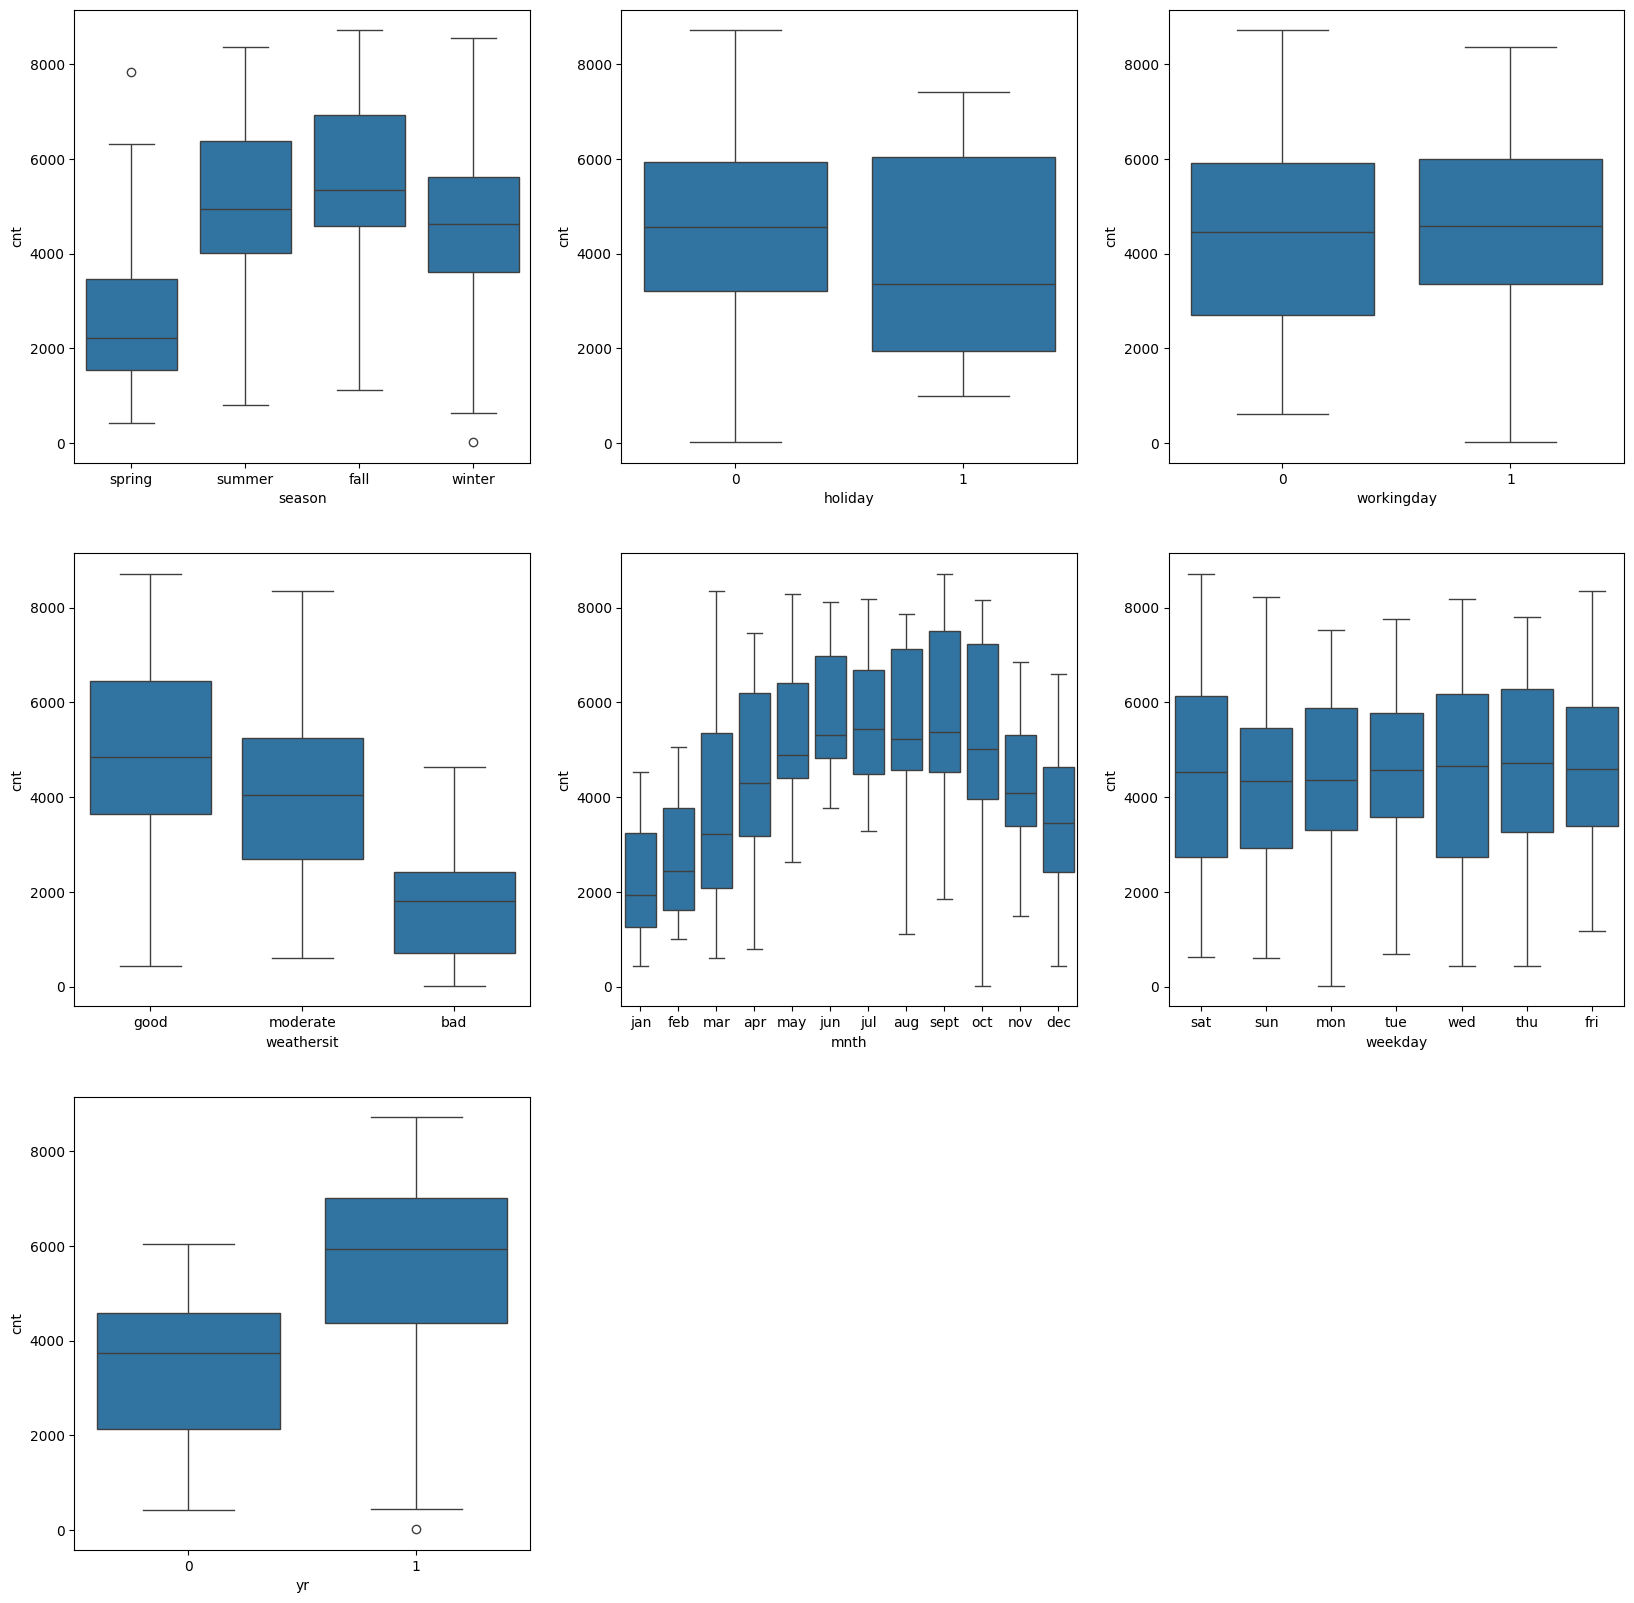

In [23]:
plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

####  Bivariate analysis
##### Bar Chart for categorical values

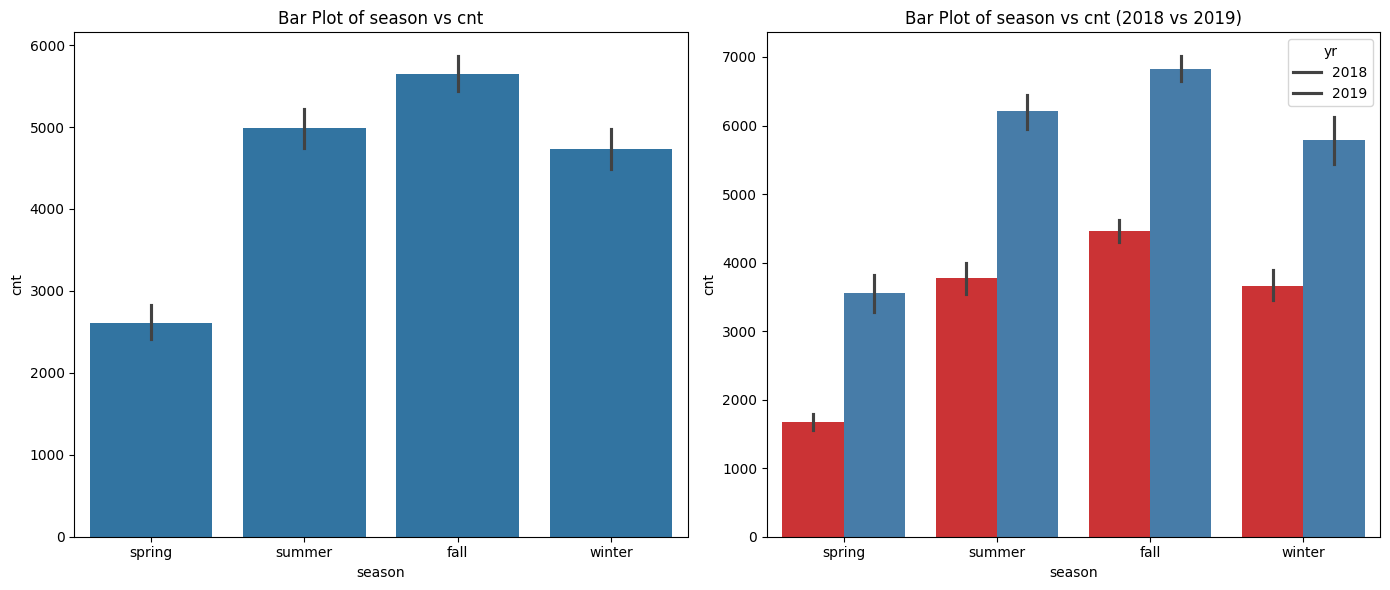

In [24]:
# Function to create barplot for categorical columns:->

def plot_bar_graphs(column):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'Bar Plot of {column} vs cnt')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x=column, y='cnt', data=df, hue='yr', palette='Set1')
    plt.title(f'Bar Plot of {column} vs cnt (2018 vs 2019)')
    plt.legend(title='yr', labels=['2018', '2019'])
    
    plt.tight_layout()
    plt.show()
    
#Calling the function with 'season' to plot
plot_bar_graphs('season')

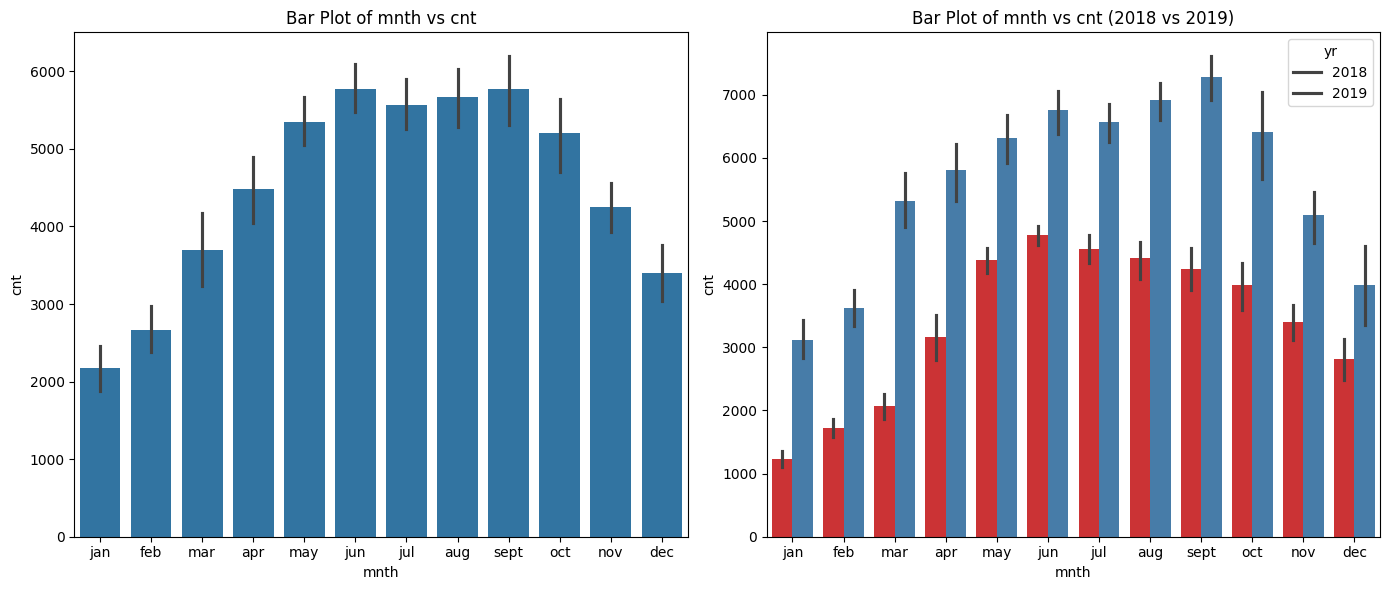

In [25]:
#Months
plot_bar_graphs('mnth')

In [26]:
# Higher number of bike recorded from May to Oct
# Bike rented in 2019 has increaded each month in comparision to 2018

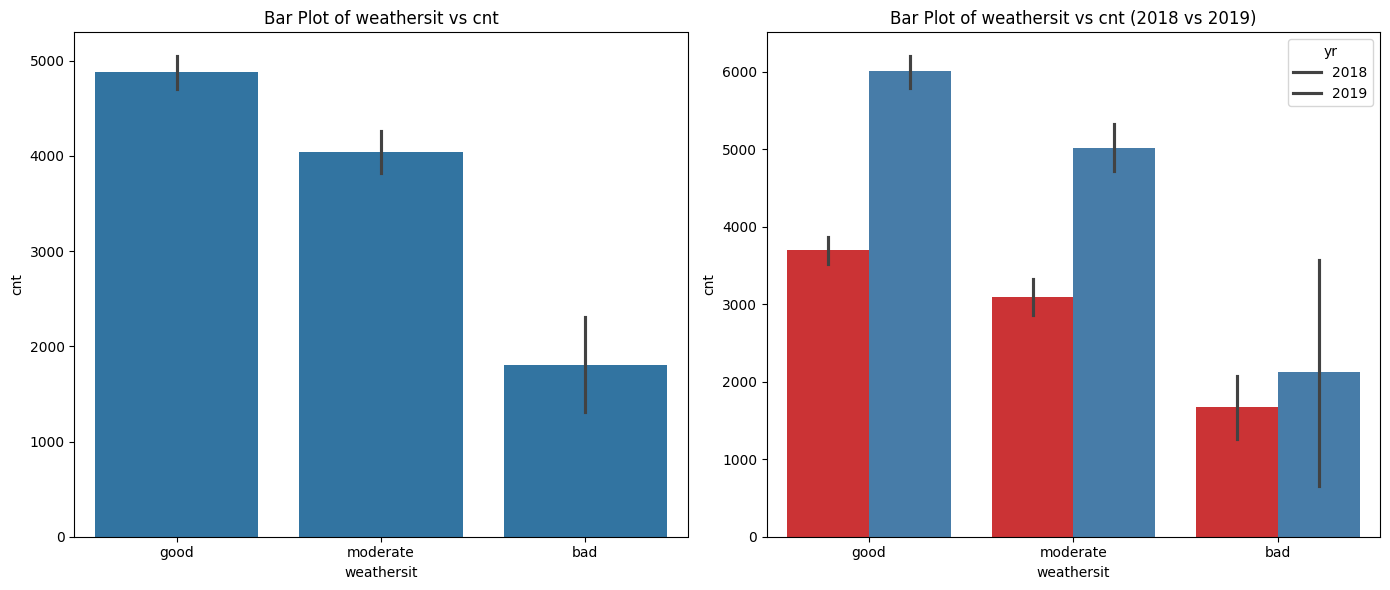

In [27]:
plot_bar_graphs('weathersit')

In [28]:
# People prefer bike rental when weather situations is good. 
# Bike registration in 2019 has increaded in every season than in 2018.

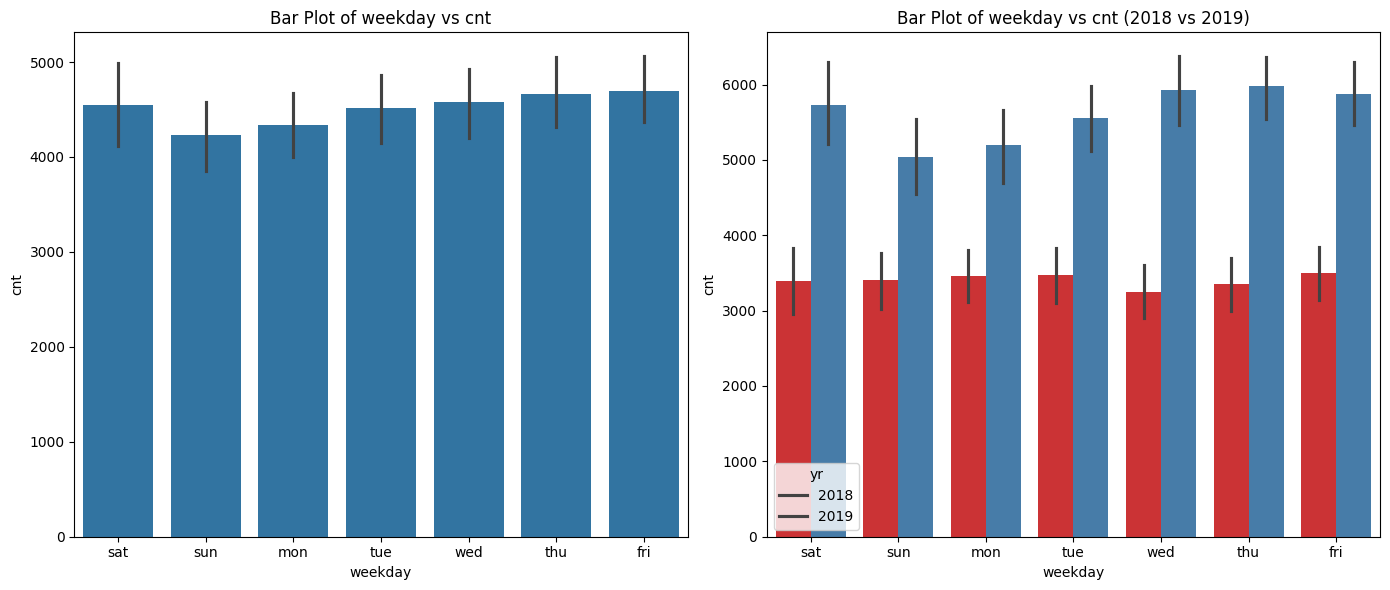

In [29]:
plot_bar_graphs('weekday')

In [30]:
# Bike rental is comparatively higher on weekdays

### Visualising Numeric Variables

In [31]:
# Converting "casual","registered" and "cnt" numeric variables to float. 
# This step is performed to seperate categorical variables like 'yr','holiday','workingday' which has binary values in them
IntVariableList = ["casual","registered","cnt"]

for var in IntVariableList:
    df[var] = df[var].astype("float")


In [32]:
# All numeric variables in the dataset
df_num = df.select_dtypes(include=['float64'])
df_num.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


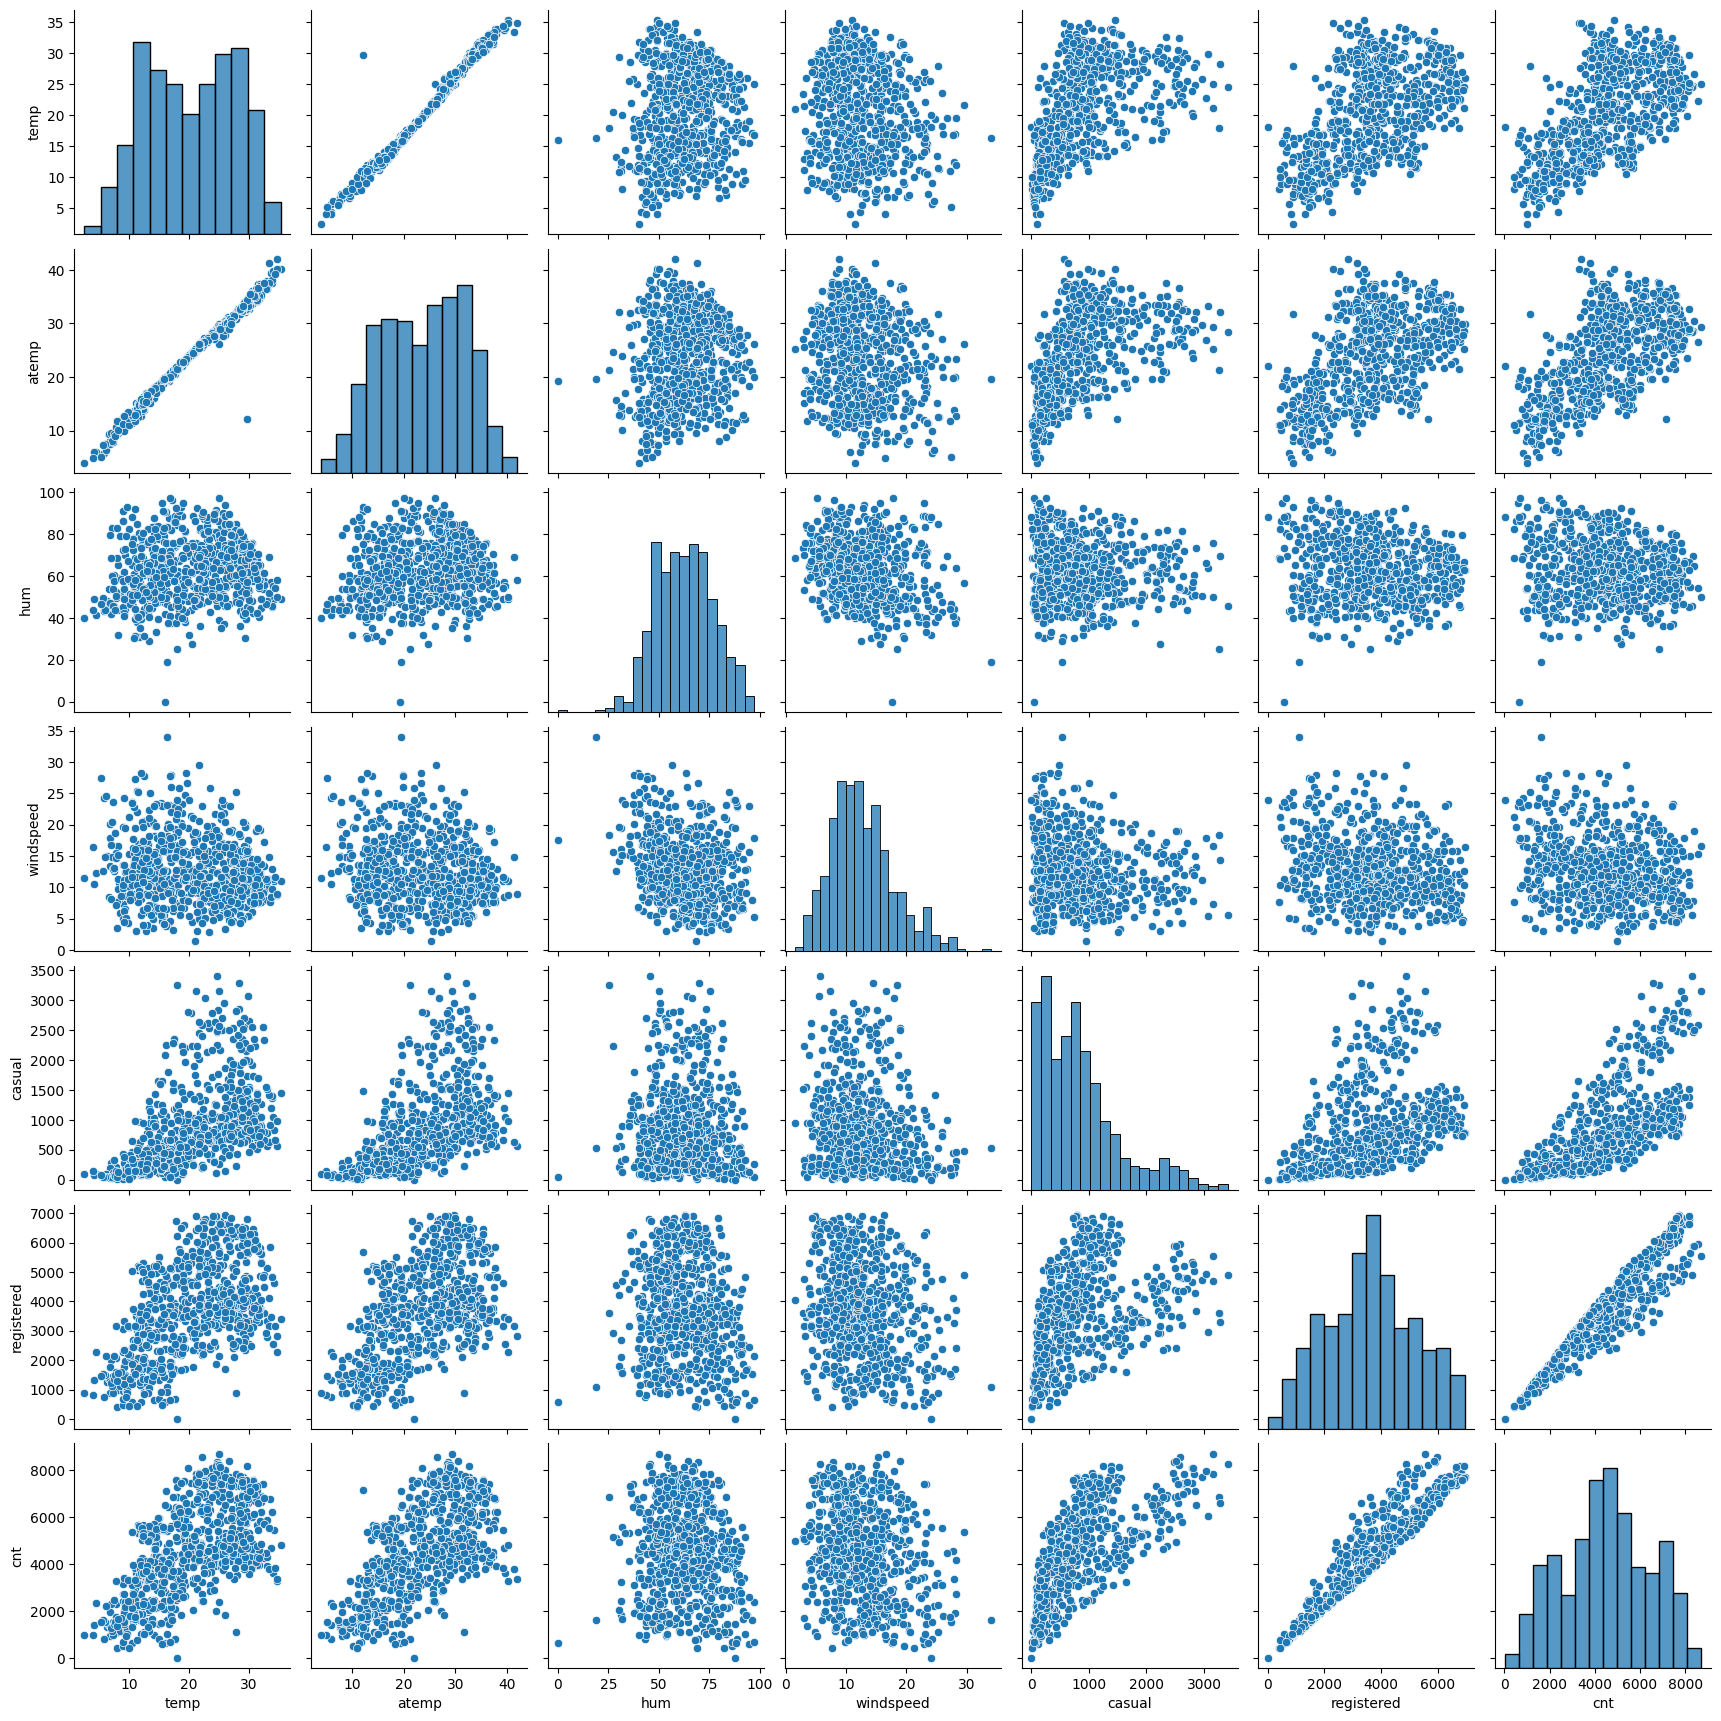

In [33]:
# Pairwise scatter plot
sns.pairplot(df_num)
plt.show()

#### - We can see that temp, atemp and count are linearly dependent
#### - We can also see that temp and atemp is highly correlated
#### - It is also observed that the Demand for bike is high between May and Oct Month

##### We can now plot correlation matrix between variables to know the exact values of correlation between them.
##### In this heatmap could be useful to visualise multiple correlations in one plot

In [34]:
# Correlation matrix
cor = df_num.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

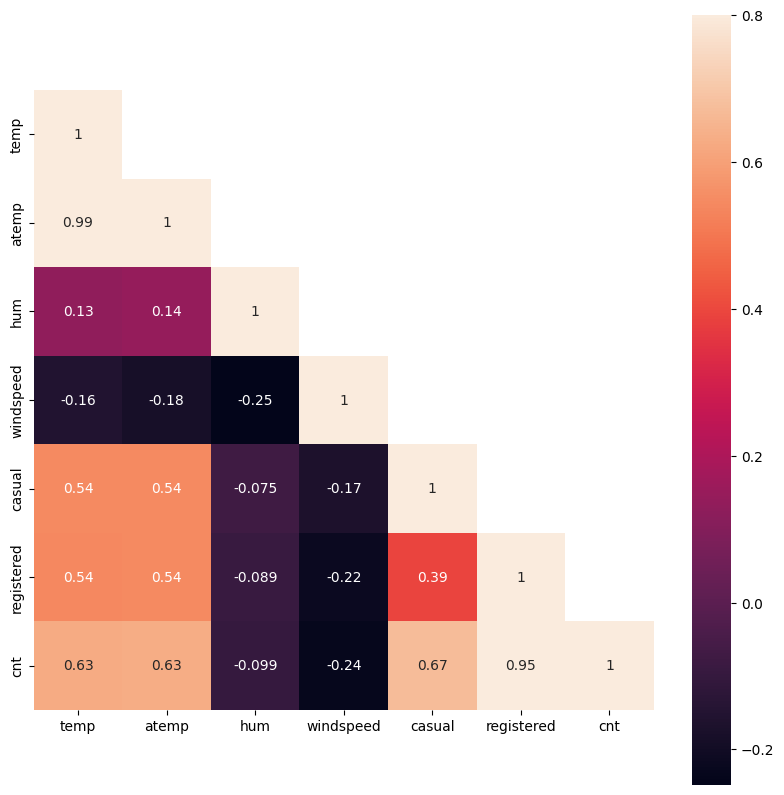

In [35]:
# heatmap
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)

### The heatmap shows some useful insights:

##### Correlation of Count('cnt') with independent variables:
Count('cnt') is highly (positively) correlated with 'casual' and 'registered' and further it is high with 'temp', and 'atemp'. We can clearly understand the high positive correlation of count with 'casual' and 'registered' as both of them together adds up to represent count.

Count is negatively correlated to 'windspeed' (-0.24 approximately). This gives us an impression that the shared bikes demand will be somewhat less on windy days as compared to normal days.

##### Correlation among independent variables:
Some of the independent variables are highly correlated (look at the top-left part of matrix): atemp and temp are highly (positively) correlated. The correlation between the two is almost equal to 1.

Thus, while building the model, we'll have to pay attention to multicollinearity.

In [36]:
# Dropping casual and Registed as  they sumed to cnt
df.drop(['casual','registered'],axis=1,inplace=True)

In [37]:
df.shape

(730, 12)

## Data Preparation
Now let's prepare the data and build the model. Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

#### Creating Dummy Variables for four categorical variables. mnth', 'weekday', 'season' & 'weathersit

In [38]:
df = pd.get_dummies(df, drop_first=True)

In [39]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985.0,False,False,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801.0,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349.0,False,False,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562.0,False,False,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600.0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 0 to 334
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    float64
 8   season_summer        730 non-null    bool   
 9   season_fall          730 non-null    bool   
 10  season_winter        730 non-null    bool   
 11  mnth_feb             730 non-null    bool   
 12  mnth_mar             730 non-null    bool   
 13  mnth_apr             730 non-null    bool   
 14  mnth_may             730 non-null    bool   
 15  mnth_jun             730 non-null    bool   


### Model Building and Evaluation

In [41]:
#Dataframe for train and test sets
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(df, train_size=0.75, test_size=0.25, random_state=50)

In [42]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
41,0,0,1,7.752731,10.67545,50.6364,7.272850,1746.0,False,False,...,False,False,False,False,False,False,False,False,False,False
205,0,0,1,30.476653,36.04790,75.7083,6.084156,3840.0,False,True,...,False,False,True,False,False,False,False,False,False,False
63,0,0,0,15.750847,18.93895,78.9167,16.875357,2077.0,False,False,...,False,False,False,True,False,False,False,False,True,False
225,0,0,0,27.743347,31.21940,81.7500,14.916411,3820.0,False,True,...,False,False,False,False,True,False,False,False,True,False
479,1,0,1,19.543347,23.51585,42.7917,7.959064,6196.0,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,0,1,22.994153,26.92665,80.7917,8.125157,6093.0,False,False,...,False,False,False,False,False,False,True,False,False,False
128,0,0,1,21.832500,26.26230,58.8750,11.792000,4362.0,True,False,...,False,False,True,False,False,False,False,False,False,False
399,1,0,0,10.830847,13.63625,77.9583,8.167032,2832.0,False,False,...,False,False,False,True,False,False,False,False,True,False
597,1,0,1,26.615847,30.05125,67.3750,4.875644,7006.0,False,True,...,False,False,False,False,False,False,True,False,False,False


In [43]:
df_test.shape

(183, 30)

#### Scaling numeric variables 

Only numeric columns, not dummy variables, need scaling, which should be applied only to the training dataset to avoid test data influence. We’ll use MinMaxScaler for scaling, though other methods can also be used if preferred.

In [44]:
#scaling numeric variables of traning data using MinMaxScalor between 0-1.
num_vars =  ['temp', 'atemp', 'hum', 'windspeed','cnt']

scaler=MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
df_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
41,0,0,1,0.122992,0.157615,0.520683,0.177620,0.198343,False,False,...,False,False,False,False,False,False,False,False,False,False
205,0,0,1,0.859384,0.855109,0.778492,0.141044,0.439254,False,True,...,False,False,True,False,False,False,False,False,False,False
63,0,0,0,0.382179,0.384780,0.811483,0.473084,0.236424,False,False,...,False,False,False,True,False,False,False,False,True,False
225,0,0,0,0.770808,0.722372,0.840617,0.412808,0.436954,False,True,...,False,False,False,False,True,False,False,False,True,False
479,1,0,1,0.505079,0.510600,0.440017,0.198734,0.710308,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,1,0,1,0.616906,0.604364,0.830763,0.203845,0.698458,False,False,...,False,False,False,False,False,False,True,False,False,False
128,0,0,1,0.579261,0.586101,0.605398,0.316672,0.499310,True,False,...,False,False,True,False,False,False,False,False,False,False
399,1,0,0,0.222741,0.239008,0.801628,0.205133,0.323286,False,False,...,False,False,False,True,False,False,False,False,True,False
597,1,0,1,0.734271,0.690260,0.692802,0.103859,0.803497,False,True,...,False,False,False,False,False,False,True,False,False,False


The variables seems to be Scaled appropriately

In [46]:
#Scaling Test dataset for further use at the end
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [47]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.491773,0.036563,0.687386,0.524810,0.511016,0.644662,0.344000,0.512483
std,0.500390,0.187858,0.463983,0.241536,0.221930,0.148577,0.161695,0.220570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.311317,0.313620,0.530206,0.228828,0.360101
50%,0.000000,0.000000,1.000000,0.536080,0.534900,0.640103,0.326911,0.523125
75%,1.000000,0.000000,1.000000,0.734824,0.697625,0.754070,0.433334,0.666647
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


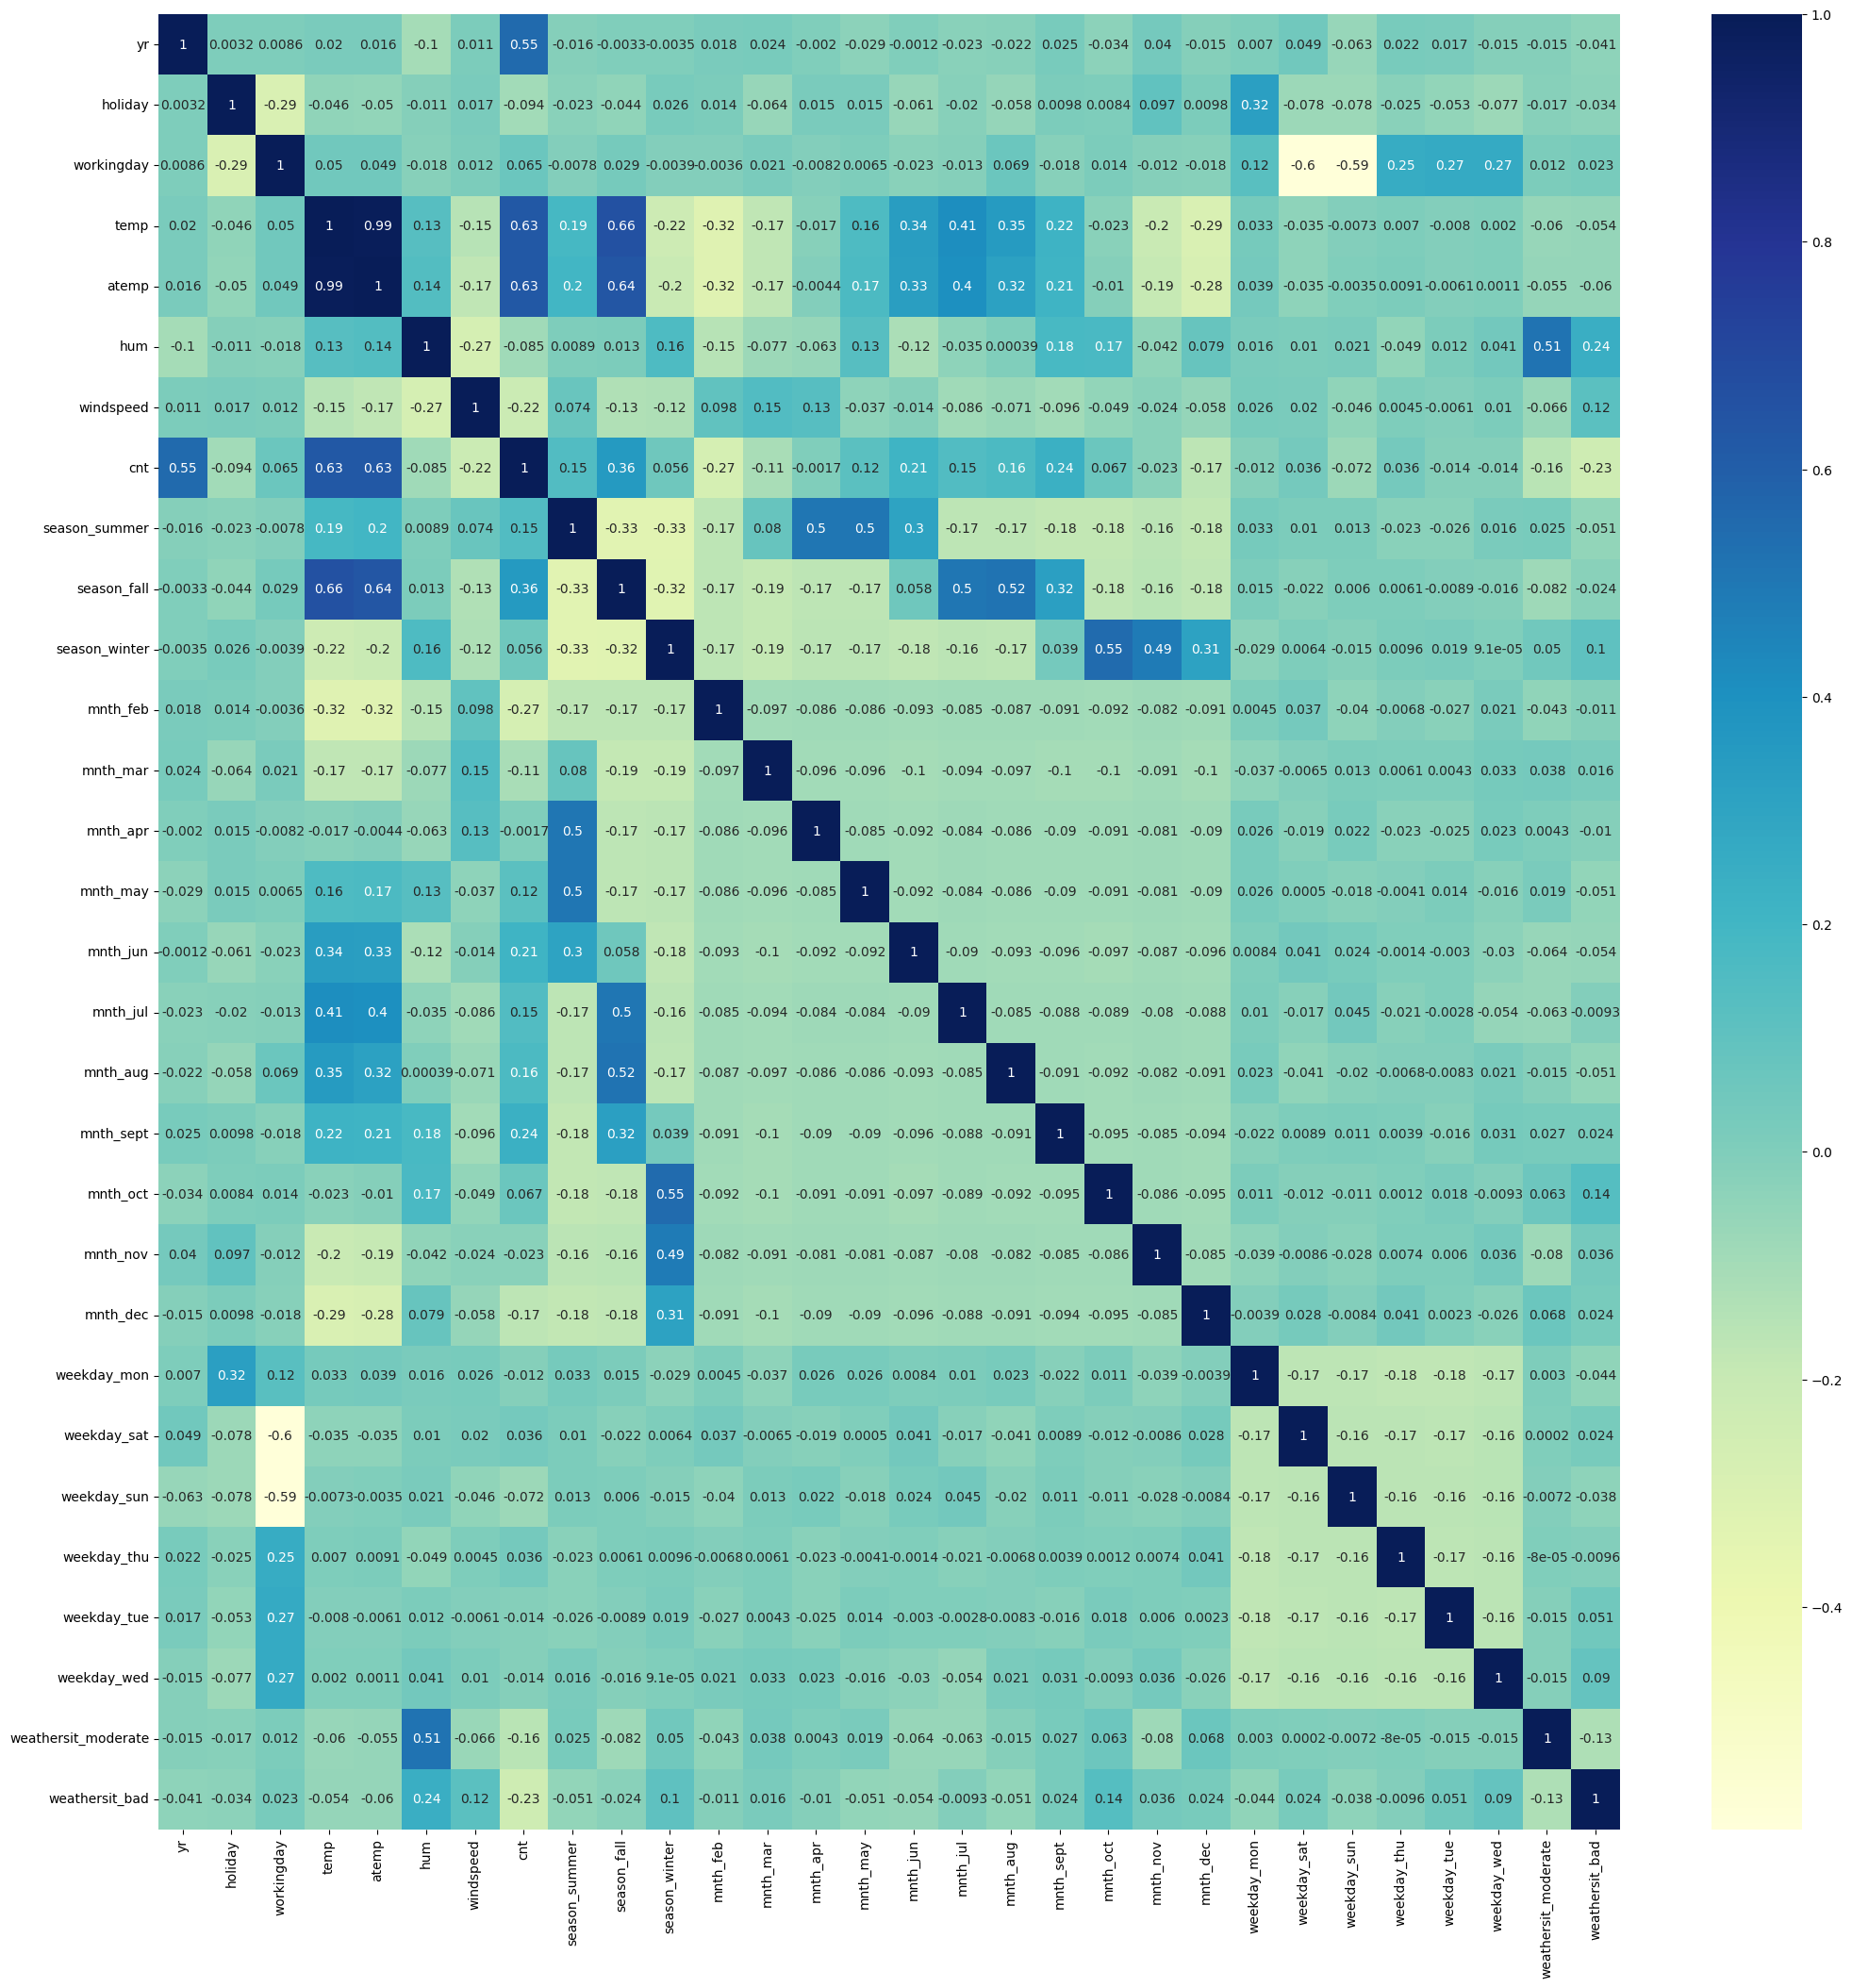

In [48]:
# Plotting a correlation matrix
plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

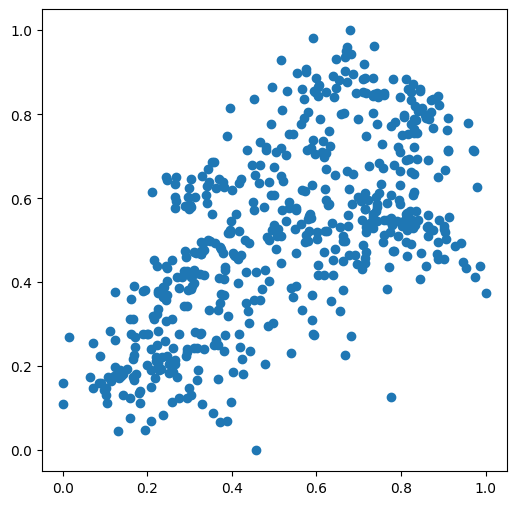

In [49]:
#As you can notice, temp seems to be correlated to cnt the most, after 'casual' and 'registered'. 
#Let's see a pairplot for temp vs cnt.
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

#### Splitting into X and Y sets for the model building

In [50]:
# poping independent and dependent variables
y_train=df_train.pop('cnt')
X_train=df_train


In [51]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_moderate,weathersit_bad
41,0,0,1,0.122992,0.157615,0.520683,0.177620,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,0,0,1,0.859384,0.855109,0.778492,0.141044,False,True,False,...,False,False,True,False,False,False,False,False,False,False
63,0,0,0,0.382179,0.384780,0.811483,0.473084,False,False,False,...,False,False,False,True,False,False,False,False,True,False
225,0,0,0,0.770808,0.722372,0.840617,0.412808,False,True,False,...,False,False,False,False,True,False,False,False,True,False
479,1,0,1,0.505079,0.510600,0.440017,0.198734,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [52]:
X_train.shape

(547, 29)

### Building Model with all features

In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547 entries, 41 to 360
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   547 non-null    int64  
 1   holiday              547 non-null    int64  
 2   workingday           547 non-null    int64  
 3   temp                 547 non-null    float64
 4   atemp                547 non-null    float64
 5   hum                  547 non-null    float64
 6   windspeed            547 non-null    float64
 7   season_summer        547 non-null    bool   
 8   season_fall          547 non-null    bool   
 9   season_winter        547 non-null    bool   
 10  mnth_feb             547 non-null    bool   
 11  mnth_mar             547 non-null    bool   
 12  mnth_apr             547 non-null    bool   
 13  mnth_may             547 non-null    bool   
 14  mnth_jun             547 non-null    bool   
 15  mnth_jul             547 non-null    bool   

In [54]:
# # Firstly, Converting boolean columns to integers (True becomes 1, False becomes 0)
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
y_train = y_train.apply(lambda x: int(x) if isinstance(x, bool) else x)

In [55]:
# Building a model with all features using statsmodels
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr1 = sm.OLS(np.asarray(y_train),X_train_lm).fit()

lr1.params

const                  0.170578
yr                     0.233440
holiday               -0.001768
workingday             0.074884
temp                   0.210597
atemp                  0.201906
hum                   -0.148690
windspeed             -0.156357
season_summer          0.099380
season_fall            0.100079
season_winter          0.171200
mnth_feb               0.021815
mnth_mar               0.076803
mnth_apr               0.047747
mnth_may               0.085548
mnth_jun               0.060194
mnth_jul               0.007981
mnth_aug               0.042533
mnth_sept              0.120760
mnth_oct               0.062715
mnth_nov              -0.006070
mnth_dec               0.003114
weekday_mon           -0.025801
weekday_sat            0.071059
weekday_sun            0.026403
weekday_thu           -0.011349
weekday_tue           -0.025848
weekday_wed           -0.017100
weathersit_moderate   -0.056378
weathersit_bad        -0.242748
dtype: float64

In [56]:
# Instantiating
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.31e-195
Time:                        14:27:27   Log-Likelihood:                 574.18
No. Observations:                 547   AIC:                            -1090.
Df Residuals:                     518   BIC:                            -965.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1706      0.023      7.453      0.000       0.126       0.216
yr                      0.2334      0.008     30.541      0.000       0.218       0.248
holiday                -0.0018      0.019     -0.094      0.925      -0.039       0.035
workingday              0.0749      0.010      7.790      0.000       0.056       0.094
temp                    0.2106      0.127      1.654      0.099      -0.040       0.461
atemp                   0.2019      0.128      1.581      0.115      -0.049       0.453
hum                    -0.1487      0.037     -4.043      0.000      -0.221      -0.076
windspeed              -0.1564      0.026     -6.046      0.000      -0.207      -0.106
season_summer           0.0994      0.022      4.486      0.000       0.056       0.143
season_fall             0.1001      0.027      3.726      0.000       0.047       0.153
season_winter           0.1712      0.024      7.222      0.000       0.125       0.218
mnth_feb                0.0218      0.019      1.175      0.241      -0.015       0.058
mnth_mar                0.0768      0.021      3.663      0.000       0.036       0.118
mnth_apr                0.0477      0.032      1.514      0.131      -0.014       0.110
mnth_may                0.0855      0.034      2.512      0.012       0.019       0.152
mnth_jun                0.0602      0.036      1.663      0.097      -0.011       0.131
mnth_jul                0.0080      0.041      0.196      0.845      -0.072       0.088
mnth_aug                0.0425      0.039      1.082      0.280      -0.035       0.120
mnth_sept               0.1208      0.034      3.529      0.000       0.054       0.188
mnth_oct                0.0627      0.032      1.984      0.048       0.001       0.125
mnth_nov               -0.0061      0.031     -0.198      0.843      -0.066       0.054
mnth_dec                0.0031      0.024      0.128      0.898      -0.045       0.051
weekday_mon            -0.0258      0.014     -1.816      0.070      -0.054       0.002
weekday_sat             0.0711      0.012      6.005      0.000       0.048       0.094
weekday_sun             0.0264      0.012      2.250      0.025       0.003       0.049
weekday_thu            -0.0113      0.014     -0.812      0.417      -0.039       0.016
weekday_tue            -0.0258      0.014     -1.853      0.064      -0.053       0.002
weekday_wed            -0.0171      0.014     -1.198      0.232      -0.045       0.011
weathersit_moderate    -0.0564      0.010     -5.597      0.000      -0.076      -0.037
weathersit_bad         -0.2427      0.025     -9.574      0.000      -0.293      -0.193
==============================================================================
Omnibus:                      101.831   Durbin-Watson:                   1.962
Prob(Omnibus):       

##### The model has a strong Adjusted R² of 84.4%, but we’ll try to improve it by reducing the number of features, excluding those less relevant to the target variable.

In [58]:
#Lets us see if we can reduce the independet features

### Model Building Using RFE
With 28 features, manual elimination isn’t feasible. We’ll use recursive feature elimination, beginning with a selection of 15 features. Then, we’ll build models with these shortlisted features in statsmodels, which offers Adjusted R-squared, unlike sklearn

In [59]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)   # running RFE

rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', np.True_, np.int64(1)),
 ('holiday', np.True_, np.int64(1)),
 ('workingday', np.False_, np.int64(6)),
 ('temp', np.True_, np.int64(1)),
 ('atemp', np.True_, np.int64(1)),
 ('hum', np.True_, np.int64(1)),
 ('windspeed', np.True_, np.int64(1)),
 ('season_summer', np.True_, np.int64(1)),
 ('season_fall', np.True_, np.int64(1)),
 ('season_winter', np.True_, np.int64(1)),
 ('mnth_feb', np.False_, np.int64(7)),
 ('mnth_mar', np.True_, np.int64(1)),
 ('mnth_apr', np.False_, np.int64(3)),
 ('mnth_may', np.True_, np.int64(1)),
 ('mnth_jun', np.False_, np.int64(2)),
 ('mnth_jul', np.False_, np.int64(14)),
 ('mnth_aug', np.False_, np.int64(4)),
 ('mnth_sept', np.True_, np.int64(1)),
 ('mnth_oct', np.True_, np.int64(1)),
 ('mnth_nov', np.False_, np.int64(13)),
 ('mnth_dec', np.False_, np.int64(15)),
 ('weekday_mon', np.False_, np.int64(9)),
 ('weekday_sat', np.False_, np.int64(5)),
 ('weekday_sun', np.False_, np.int64(10)),
 ('weekday_thu', np.False_, np.int64(12)),
 ('weekday_tue', np.Fal

In [60]:
# RFE support Variables
col = X_train.columns[rfe.support_]
print(len(col))
col

15


Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_sept',
       'mnth_oct', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')

In [61]:
# RFE not Supported Variables
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_feb', 'mnth_apr', 'mnth_jun', 'mnth_jul',
       'mnth_aug', 'mnth_nov', 'mnth_dec', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [62]:
# Lets consider only  the RFE supported columns for model building 
X_train_rfe = X_train[col]

In [63]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
# Creating Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif   


In [64]:
#Calling function
calculateVIF(X_train_rfe)

,Features,VIF
3,atemp,335.20
2,temp,326.49
4,hum,15.01
7,season_fall,6.52
5,windspeed,4.36
6,season_summer,3.84
8,season_winter,3.01
13,weathersit_moderate,2.14
0,yr,1.92
12,mnth_oct,1.69


### Model Building and Evaluation
Now, Checking the summary of this model using statsmodels

In [65]:
# Model 2 
#Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.2
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          9.47e-204
Time:                        14:27:41   Log-Likelihood:                 561.30
No. Observations:                 547   AIC:                            -1091.
Df Residuals:                     531   BIC:                            -1022.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2434      0.027      9.078      0.000       0.191       0.296
yr                      0.2334      0.008     30.639      0.000       0.218       0.248
holiday                -0.0862      0.020     -4.267      0.000      -0.126      -0.046
temp                    0.3091      0.118      2.609      0.009       0.076       0.542
atemp                   0.1349      0.125      1.077      0.282      -0.111       0.381
hum                    -0.1693      0.036     -4.704      0.000      -0.240      -0.099
windspeed              -0.1555      0.026     -6.025      0.000      -0.206      -0.105
season_summer           0.1219      0.015      8.305      0.000       0.093       0.151
season_fall             0.0953      0.019      4.930      0.000       0.057       0.133
season_winter           0.1575      0.013     11.800      0.000       0.131       0.184
mnth_mar                0.0496      0.014      3.579      0.000       0.022       0.077
mnth_may                0.0378      0.017      2.248      0.025       0.005       0.071
mnth_sept               0.1011      0.015      6.816      0.000       0.072       0.130
mnth_oct                0.0567      0.017      3.400      0.001       0.024       0.089
weathersit_moderate    -0.0526      0.010     -5.225      0.000      -0.072      -0.033
weathersit_bad         -0.2400      0.025     -9.466      0.000      -0.290      -0.190
==============================================================================
Omnibus:                       91.350   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.203
Skew:                          -0.821   Prob(JB):                     2.83e-55
Kurtosis:                       5.886   Cond. No.                         75.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The new model with selected features shows only a slight accuracy drop, from 84.4% to 84.1%, suggesting it’s effective to proceed with these features. Next, we’ll check for multicollinearity among the variables.

In [66]:
X_train_rfe2 = X_train_rfe.drop(["atemp"], axis = 1)
X_train_rfe2.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_may,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
41,0,0,0.122992,0.520683,0.177620,0,0,0,0,0,0,0,0,0
205,0,0,0.859384,0.778492,0.141044,0,1,0,0,0,0,0,0,0
63,0,0,0.382179,0.811483,0.473084,0,0,0,1,0,0,0,1,0
225,0,0,0.770808,0.840617,0.412808,0,1,0,0,0,0,0,1,0
479,1,0,0.505079,0.440017,0.198734,1,0,0,0,0,0,0,0,0


In [67]:
calculateVIF(X_train_rfe2)

,Features,VIF
2,temp,19.16
3,hum,13.78
6,season_fall,6.49
4,windspeed,4.33
5,season_summer,3.83
7,season_winter,3.00
12,weathersit_moderate,2.12
0,yr,1.92
11,mnth_oct,1.69
9,mnth_may,1.55


In [68]:
#Model 3 
#Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     206.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.15e-204
Time:                        14:27:45   Log-Likelihood:                 560.71
No. Observations:                 547   AIC:                            -1091.
Df Residuals:                     532   BIC:                            -1027.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2480      0.026      9.368      0.000       0.196       0.300
yr                      0.2332      0.008     30.619      0.000       0.218       0.248
holiday                -0.0870      0.020     -4.308      0.000      -0.127      -0.047
temp                    0.4328      0.029     14.938      0.000       0.376       0.490
hum                    -0.1675      0.036     -4.658      0.000      -0.238      -0.097
windspeed              -0.1600      0.025     -6.285      0.000      -0.210      -0.110
season_summer           0.1226      0.015      8.359      0.000       0.094       0.151
season_fall             0.0939      0.019      4.868      0.000       0.056       0.132
season_winter           0.1580      0.013     11.850      0.000       0.132       0.184
mnth_mar                0.0499      0.014      3.601      0.000       0.023       0.077
mnth_may                0.0378      0.017      2.243      0.025       0.005       0.071
mnth_sept               0.1015      0.015      6.841      0.000       0.072       0.131
mnth_oct                0.0572      0.017      3.435      0.001       0.024       0.090
weathersit_moderate    -0.0529      0.010     -5.258      0.000      -0.073      -0.033
weathersit_bad         -0.2414      0.025     -9.530      0.000      -0.291      -0.192
==============================================================================
Omnibus:                       91.126   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.538
Skew:                          -0.817   Prob(JB):                     2.39e-55
Kurtosis:                       5.892   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
X_train_rfe3=X_train_rfe2.drop('temp',axis=1)
X_train_rfe3.head()

,yr,holiday,hum,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_may,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
41,0,0,0.520683,0.177620,0,0,0,0,0,0,0,0,0
205,0,0,0.778492,0.141044,0,1,0,0,0,0,0,0,0
63,0,0,0.811483,0.473084,0,0,0,1,0,0,0,1,0
225,0,0,0.840617,0.412808,0,1,0,0,0,0,0,1,0
479,1,0,0.440017,0.198734,1,0,0,0,0,0,0,0,0


In [70]:
calculateVIF(X_train_rfe3)

,Features,VIF
2,hum,10.25
3,windspeed,4.26
6,season_winter,2.79
4,season_summer,2.39
5,season_fall,2.34
11,weathersit_moderate,2.02
0,yr,1.89
10,mnth_oct,1.63
8,mnth_may,1.54
9,mnth_sept,1.30


In [71]:
#Model 3 
#Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     145.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.68e-165
Time:                        14:27:50   Log-Likelihood:                 464.91
No. Observations:                 547   AIC:                            -901.8
Df Residuals:                     533   BIC:                            -841.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3178      0.031     10.247      0.000       0.257       0.379
yr                      0.2428      0.009     26.871      0.000       0.225       0.261
holiday                -0.0873      0.024     -3.632      0.000      -0.134      -0.040
hum                    -0.0870      0.042     -2.057      0.040      -0.170      -0.004
windspeed              -0.1609      0.030     -5.309      0.000      -0.220      -0.101
season_summer           0.2540      0.014     18.189      0.000       0.227       0.281
season_fall             0.3210      0.014     22.691      0.000       0.293       0.349
season_winter           0.2053      0.015     13.315      0.000       0.175       0.236
mnth_mar                0.0602      0.016      3.653      0.000       0.028       0.093
mnth_may                0.0673      0.020      3.383      0.001       0.028       0.106
mnth_sept               0.1048      0.018      5.937      0.000       0.070       0.140
mnth_oct                0.1104      0.019      5.698      0.000       0.072       0.148
weathersit_moderate    -0.0719      0.012     -6.048      0.000      -0.095      -0.049
weathersit_bad         -0.2892      0.030     -9.669      0.000      -0.348      -0.230
==============================================================================
Omnibus:                       64.544   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.185
Skew:                          -0.576   Prob(JB):                     7.47e-40
Kurtosis:                       5.565   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_train_rfe4=X_train_rfe3.drop('hum',axis=1)
X_train_rfe4.head()


,yr,holiday,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_may,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
41,0,0,0.177620,0,0,0,0,0,0,0,0,0
205,0,0,0.141044,0,1,0,0,0,0,0,0,0
63,0,0,0.473084,0,0,0,1,0,0,0,1,0
225,0,0,0.412808,0,1,0,0,0,0,0,1,0
479,1,0,0.198734,1,0,0,0,0,0,0,0,0


In [73]:
calculateVIF(X_train_rfe4)

,Features,VIF
2,windspeed,3.06
5,season_winter,2.19
3,season_summer,2.09
0,yr,1.82
4,season_fall,1.72
9,mnth_oct,1.62
7,mnth_may,1.49
10,weathersit_moderate,1.48
8,mnth_sept,1.29
6,mnth_mar,1.26


In [74]:
#Model 4
#Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.07e-165
Time:                        14:27:55   Log-Likelihood:                 462.75
No. Observations:                 547   AIC:                            -899.5
Df Residuals:                     534   BIC:                            -843.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2630      0.016     16.506      0.000       0.232       0.294
yr                      0.2447      0.009     27.146      0.000       0.227       0.262
holiday                -0.0880      0.024     -3.650      0.000      -0.135      -0.041
windspeed              -0.1426      0.029     -4.907      0.000      -0.200      -0.085
season_summer           0.2526      0.014     18.056      0.000       0.225       0.280
season_fall             0.3189      0.014     22.533      0.000       0.291       0.347
season_winter           0.2027      0.015     13.151      0.000       0.172       0.233
mnth_mar                0.0603      0.017      3.651      0.000       0.028       0.093
mnth_may                0.0603      0.020      3.066      0.002       0.022       0.099
mnth_sept               0.0984      0.017      5.644      0.000       0.064       0.133
mnth_oct                0.1066      0.019      5.510      0.000       0.069       0.145
weathersit_moderate    -0.0862      0.010     -8.932      0.000      -0.105      -0.067
weathersit_bad         -0.3137      0.028    -11.406      0.000      -0.368      -0.260
==============================================================================
Omnibus:                       64.209   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.239
Skew:                          -0.578   Prob(JB):                     5.37e-39
Kurtosis:                       5.529   Cond. No.                         9.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model seems good now, Let's take a look at the VIF values.

As you can see now, all the VIF values and p-values seem to be in the permissible range now. Also the Adjusted R-squared value has dropped from 84.4% with 28 variables to just 77.3% using 12 variables. So now, let's proceed with this model for further analysis

### Residual Analysis
Before we make predictions on the test set, let's first analyse the residuals

In [75]:
# Lets perform Residual Analysis
y_train_pred = lr5.predict(X_train_lm5)
residual = y_train_pred - y_train

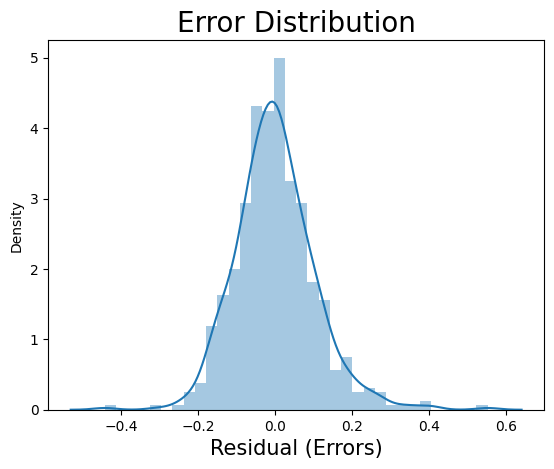

In [76]:
#1. Assumption of Normally Distributed Error Term

# Plot the histogram of the error terms
sns.distplot(residual)
plt.xlabel('Residual (Errors)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
plt.show() 

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making predictions using test dataset

In [77]:
# divie into x and y
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 516 to 218
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   183 non-null    int64  
 1   holiday              183 non-null    int64  
 2   workingday           183 non-null    int64  
 3   temp                 183 non-null    float64
 4   atemp                183 non-null    float64
 5   hum                  183 non-null    float64
 6   windspeed            183 non-null    float64
 7   season_summer        183 non-null    bool   
 8   season_fall          183 non-null    bool   
 9   season_winter        183 non-null    bool   
 10  mnth_feb             183 non-null    bool   
 11  mnth_mar             183 non-null    bool   
 12  mnth_apr             183 non-null    bool   
 13  mnth_may             183 non-null    bool   
 14  mnth_jun             183 non-null    bool   
 15  mnth_jul             183 non-null    bool  

In [78]:
# Let's check the list X_train_lm4 which had the 6 variables RFE had selected
X_train_lm5= X_train_lm5.drop(['const'], axis = 1)

X_test=X_test[X_train_lm5.columns]
# Adding constant variable to test dataframe
X_test_lr5 = sm.add_constant(X_test)


In [79]:
y_test_pred = lr5.predict(X_test_lr5)

In [80]:
lr5.params

const                  0.262986
yr                     0.244674
holiday               -0.087963
windspeed             -0.142564
season_summer          0.252574
season_fall            0.318854
season_winter          0.202719
mnth_mar               0.060307
mnth_may               0.060281
mnth_sept              0.098371
mnth_oct               0.106561
weathersit_moderate   -0.086239
weathersit_bad        -0.313713
dtype: float64

Text(0, 0.5, 'y_pred')

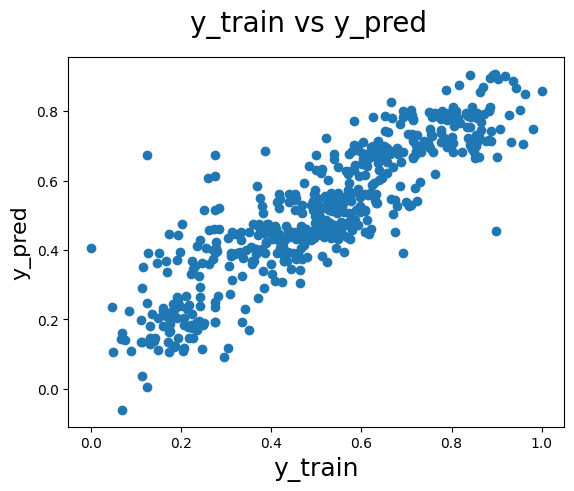

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Text(0, 0.5, 'y_test_pred')

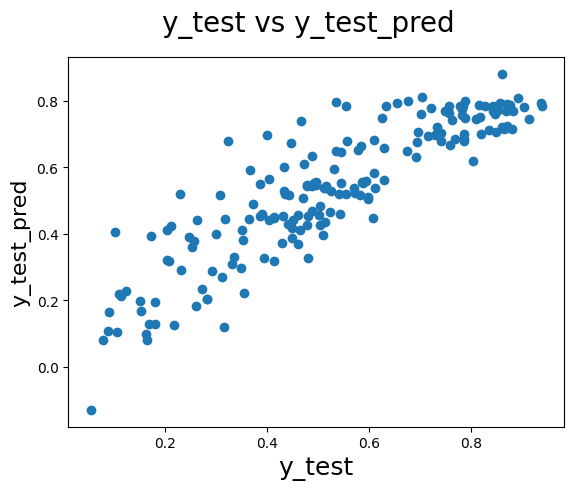

In [82]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

 ### Generating Test R² 

In [83]:
r2_score(y_test, y_test_pred)

0.7768749402088317

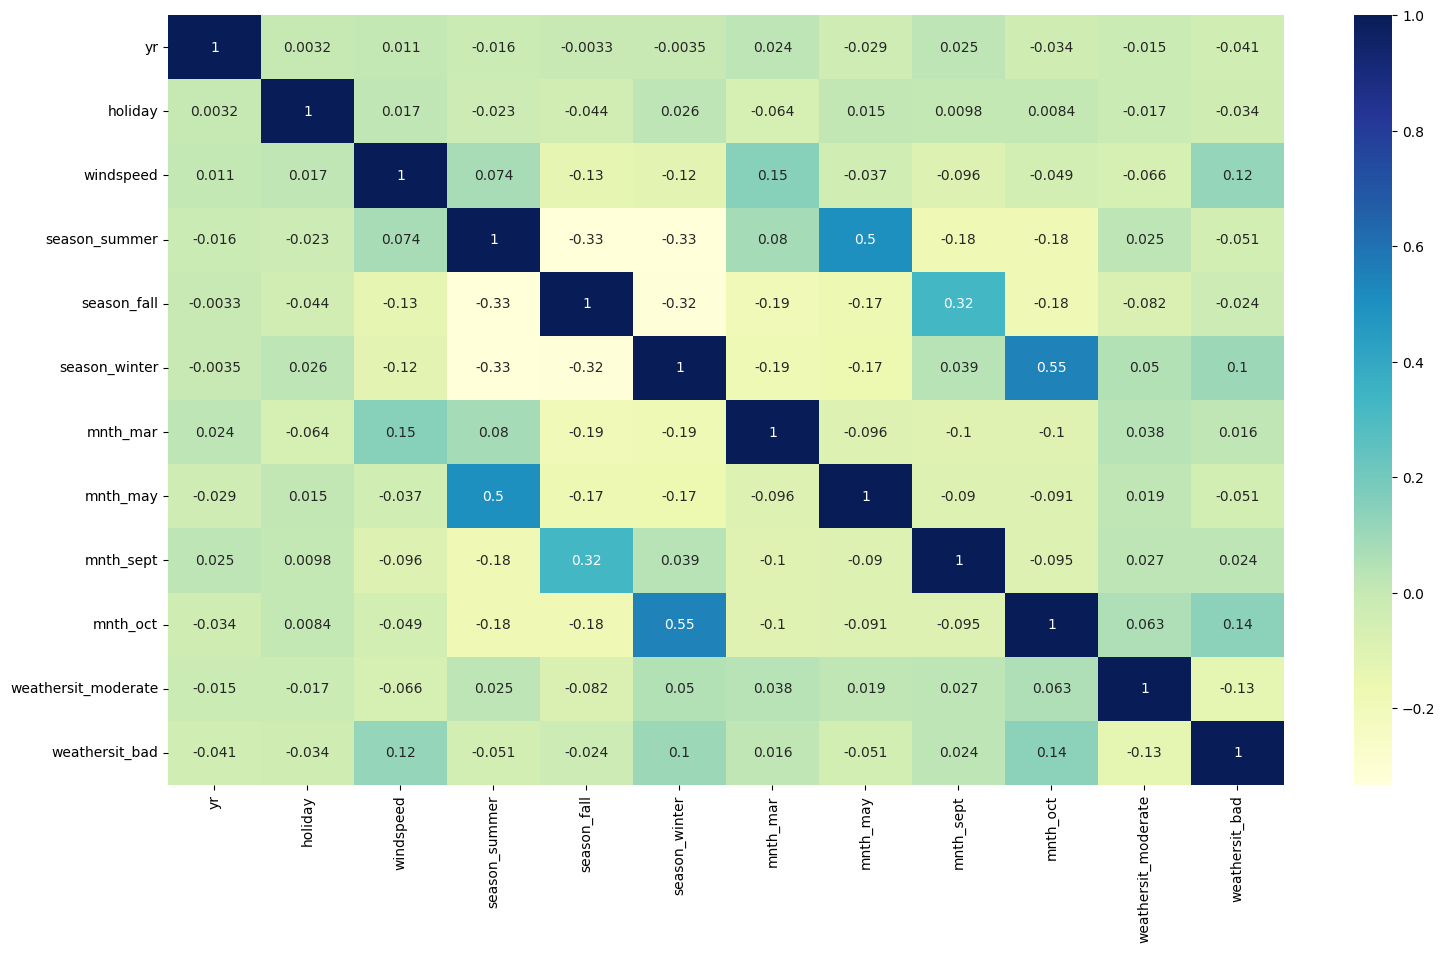

In [84]:
plt.figure(figsize = (18, 10))
# Heatmap
sns.heatmap(X_train_rfe4.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [85]:
train_r2=0.778
train_adj_r2=0.773

In [86]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

#Finding the Adjusted R2 using the formula

test_adj_r2 = 1-((1-train_r2)*(n-1))/(n-p-1)
test_adj_r2


0.7623294117647059

In [87]:
# Train R-square=0.778
# Test R-square=0.776
# Train Adj-R-square=0.773
# Test Adj-R-square=0.762
###-----------------------------------###
# That seems a very good models.

As per above analysis we didn't found multi-colinearity among independedt variables.

This is the simplest model that we could build. The final predictors seem to have fairly low correlations. 

### This model can be used for predicting count of daily bike rentals.